# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who:
   - have a **low total_claim_amount** (e.g., below $1,000),
   - have a response "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze:
   - the average `monthly_premium` and/or customer lifetime value by `policy_type` and `gender` for customers who responded "Yes", and
   - compare these insights to `total_claim_amount` patterns, and discuss which segments appear most profitable or low-risk for the company.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [30]:
import pandas as pd
import numpy as np

In [31]:
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv'
df = pd.read_csv(url)

In [32]:
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [34]:
duplicates = df.duplicated()  # Returns Boolean Series for rows with duplicates
num_duplicates = duplicates.sum()
print("\nNumber of duplicate rows:", num_duplicates)

# Display duplicate rows if any
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(df[duplicates])

# Check for null values in each column
null_counts = df.isnull().sum()
print("\nNull values in each column:")
print(null_counts)


Number of duplicate rows: 0

Null values in each column:
Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                  

In [35]:
df_filled = df.fillna('unknown')

# Display the DataFrame after replacing NaN values
print("\nDataFrame after replacing NaN values with 'unknown':")
print(df_filled)


DataFrame after replacing NaN values with 'unknown':
       Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877     unknown              6857.519928  unknown   

       Coverage Education Effecti

In [43]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

1. Task

In [60]:

new_df = df[(df['total_claim_amount'] < 1000) & (df['response'] == 'Yes')]

# Display the filtered DataFrame
print("\nFiltered DataFrame:")
print(new_df)


Filtered DataFrame:
       unnamed:_0 customer       state  customer_lifetime_value response  \
3               3  XL78013      Oregon             22332.439460      Yes   
8               8  FM55990  California              5989.773931      Yes   
15             15  CW49887  California              4626.801093      Yes   
19             19  NJ54277  California              3746.751625      Yes   
27             27  MQ68407      Oregon              4376.363592      Yes   
...           ...      ...         ...                      ...      ...   
10844       10844  FM31768     Arizona              5979.724161      Yes   
10852       10852  KZ80424  Washington              8382.478392      Yes   
10872       10872  XT67997  California              5979.724161      Yes   
10887       10887  BY78730      Oregon              8879.790017      Yes   
10897       10897  MM70762     Arizona              9075.768214      Yes   

       coverage             education effective_to_date employment

2. Task from original data set

In [72]:
responded_yes = df[df['response'] == 'Yes']

average_metrics = responded_yes.groupby(['policy_type', 'gender']).agg(
    average_monthly_premium=('monthly_premium_auto', 'mean'),
    average_customer_lifetime_value=('customer_lifetime_value', 'mean')
).reset_index()

# Display the results
print("Average Monthly Premium and Customer Lifetime Value by Policy Type and Gender for 'Yes' Responses:")
print(average_metrics)

Average Monthly Premium and Customer Lifetime Value by Policy Type and Gender for 'Yes' Responses:
      policy_type gender  average_monthly_premium  \
0  Corporate Auto      F                94.301775   
1  Corporate Auto      M                92.188312   
2   Personal Auto      F                98.998148   
3   Personal Auto      M                91.085821   
4    Special Auto      F                92.314286   
5    Special Auto      M                86.343750   

   average_customer_lifetime_value  
0                      7712.628736  
1                      7944.465414  
2                      8339.791842  
3                      7448.383281  
4                      7691.584111  
5                      8247.088702  


In [62]:
average_metrics = responded_yes.groupby(['policy_type', 'gender']).agg(
    average_monthly_premium=('monthly_premium_auto', 'mean'),
    average_customer_lifetime_value=('customer_lifetime_value', 'mean'),
    average_total_claim_amount=('total_claim_amount', 'mean')
).reset_index()

# Display the results
print("Average Metrics by Policy Type and Gender for 'Yes' Responses:")
print(average_metrics)

# Profitability and Risk
average_metrics['profitability'] = average_metrics['average_customer_lifetime_value'] - average_metrics['average_total_claim_amount']
average_metrics['risk'] = average_metrics['average_total_claim_amount'] / average_metrics['average_customer_lifetime_value']

print("Profitability and Risk Analysis:")
print(average_metrics[['policy_type', 'gender', 'profitability', 'risk']])

Average Metrics by Policy Type and Gender for 'Yes' Responses:
      policy_type gender  average_monthly_premium  \
0  Corporate Auto      F                89.042945   
1  Corporate Auto      M                88.546667   
2   Personal Auto      F                90.620079   
3   Personal Auto      M                87.433852   
4    Special Auto      F                86.705882   
5    Special Auto      M                80.000000   

   average_customer_lifetime_value  average_total_claim_amount  
0                      7334.770760                  407.800039  
1                      7920.399363                  388.247325  
2                      7966.926671                  404.972992  
3                      7481.817882                  427.868684  
4                      7594.009218                  426.658992  
5                      8348.232787                  390.329804  
Profitability and Risk Analysis:
      policy_type gender  profitability      risk
0  Corporate Auto      F   

In [63]:


# Identify where the risk is lowest
min_risk_row = average_metrics.loc[average_metrics['risk'].idxmin()]

# Display Profitability and Risk Analysis
print("\nProfitability and Risk Analysis (Risk in %):")
print(average_metrics[['policy_type', 'gender', 'profitability', 'risk']])

# Display the segment with the lowest risk
print("\nSegment with Lowest Risk:")
print(min_risk_row)


Profitability and Risk Analysis (Risk in %):
      policy_type gender  profitability      risk
0  Corporate Auto      F    6926.970721  0.055598
1  Corporate Auto      M    7532.152038  0.049019
2   Personal Auto      F    7561.953680  0.050832
3   Personal Auto      M    7053.949198  0.057188
4    Special Auto      F    7167.350226  0.056184
5    Special Auto      M    7957.902984  0.046756

Segment with Lowest Risk:
policy_type                        Special Auto
gender                                        M
average_monthly_premium                    80.0
average_customer_lifetime_value     8348.232787
average_total_claim_amount           390.329804
profitability                       7957.902984
risk                                   0.046756
Name: 5, dtype: object


It seems that lowest risk is for Special cars where risk is only 4,675 %

3. Task # Group by state and count the number of customers only for the states with 500 costumers


In [ ]:
state_counts = df.groupby('state')['customer'].count().reset_index()

state_counts.columns = ['state', 'number_of_customers']

# include only states with more than 500 customers
filtered_states = state_counts[state_counts['number_of_customers'] > 500]

# Display results
print("States with more than 500 customers:")
print(filtered_states)

States with more than 500 customers:
Empty DataFrame
Columns: [state, number_of_customers]
Index: []


In [68]:
clv_stats = df.groupby(['education', 'gender']).agg(
    max_clv=('customer_lifetime_value', 'max'),
    min_clv=('customer_lifetime_value', 'min'),
    median_clv=('customer_lifetime_value', 'median')
).reset_index()

# Display the results
print("Customer Lifetime Value Statistics by Education Level and Gender:")
print(clv_stats)

Customer Lifetime Value Statistics by Education Level and Gender:
              education gender      max_clv      min_clv   median_clv
0              Bachelor      F  73225.95652  1904.000852  5640.505303
1              Bachelor      M  67907.27050  1898.007675  5548.031892
2               College      F  61850.18803  1898.683686  5623.611187
3               College      M  61134.68307  1918.119700  6005.847375
4                Doctor      F  44856.11397  2395.570000  5332.462694
5                Doctor      M  32677.34284  2267.604038  5577.669457
6  High School or Below      F  55277.44589  2144.921535  6039.553187
7  High School or Below      M  83325.38119  1940.981221  6286.731006
8                Master      F  51016.06704  2417.777032  5729.855012
9                Master      M  50568.25912  2272.307310  5579.099207


C:\Users\User\AppData\Local\Temp\ipykernel_22348\3940951289.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_stats, x='Education', y='CLV', hue='Statistic', ci=None, palette='muted', dodge=True)


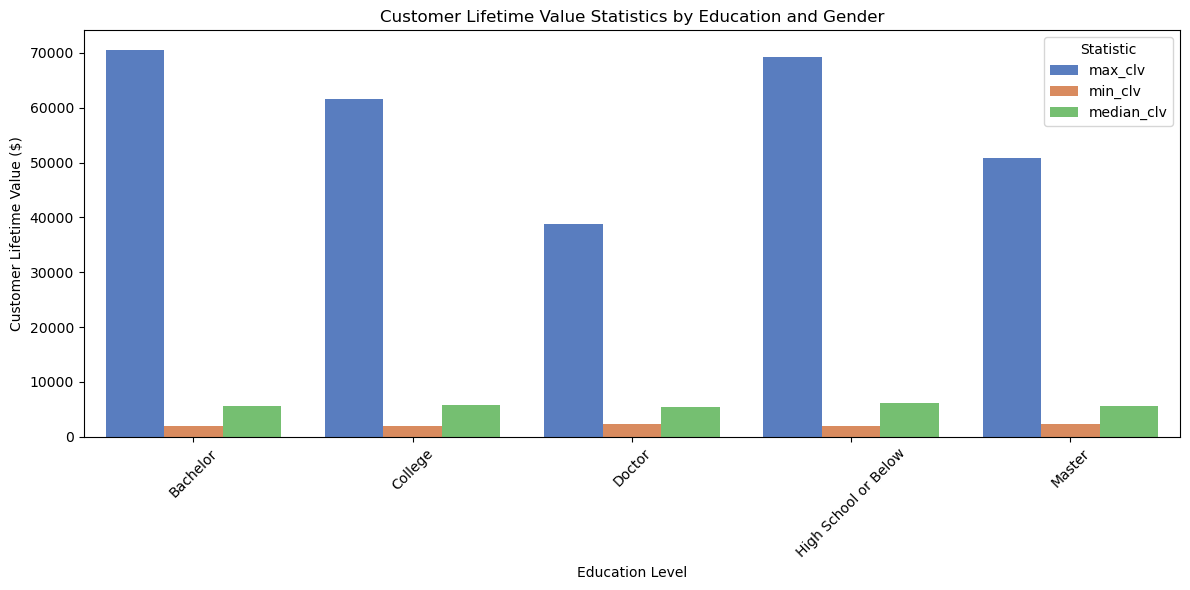

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the existing clv_stats and melted_stats variables
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_stats, x='Education', y='CLV', hue='Statistic', ci=None, palette='muted', dodge=True)
plt.title('Customer Lifetime Value Statistics by Education and Gender')
plt.xlabel('Education Level')
plt.ylabel('Customer Lifetime Value ($)')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

4.Task

In [77]:
clv_statistics = df.groupby(['education', 'gender']).agg(
    max_clv=('customer_lifetime_value', 'max'),
    min_clv=('customer_lifetime_value', 'min'),
    median_clv=('customer_lifetime_value', 'median')
).reset_index()

# Display the results
print("\nCustomer Lifetime Value Statistics by Education and Gender:")
print(clv_statistics)


Customer Lifetime Value Statistics by Education and Gender:
              education gender      max_clv      min_clv   median_clv
0              Bachelor      F  73225.95652  1904.000852  5640.505303
1              Bachelor      M  67907.27050  1898.007675  5548.031892
2               College      F  61850.18803  1898.683686  5623.611187
3               College      M  61134.68307  1918.119700  6005.847375
4                Doctor      F  44856.11397  2395.570000  5332.462694
5                Doctor      M  32677.34284  2267.604038  5577.669457
6  High School or Below      F  55277.44589  2144.921535  6039.553187
7  High School or Below      M  83325.38119  1940.981221  6286.731006
8                Master      F  51016.06704  2417.777032  5729.855012
9                Master      M  50568.25912  2272.307310  5579.099207


In [78]:
highest_max = clv_stats.loc[clv_stats['max_clv'].idxmax()]
lowest_min = clv_stats.loc[clv_stats['min_clv'].idxmin()]
most_median = clv_stats.loc[clv_stats['median_clv'].idxmax()]

# Display the findings
print("\nHighest Maximum CLV Segment:")
print(highest_max)

print("\nLowest Minimum CLV Segment:")
print(lowest_min)

print("\nMost Common (Highest) Median CLV Segment:")
print(most_median)


Highest Maximum CLV Segment:
education     High School or Below
gender                           M
max_clv                83325.38119
min_clv                1940.981221
median_clv             6286.731006
Name: 7, dtype: object

Lowest Minimum CLV Segment:
education        Bachelor
gender                  M
max_clv        67907.2705
min_clv       1898.007675
median_clv    5548.031892
Name: 1, dtype: object

Most Common (Highest) Median CLV Segment:
education     High School or Below
gender                           M
max_clv                83325.38119
min_clv                1940.981221
median_clv             6286.731006
Name: 7, dtype: object


5. BONUS

In [85]:
df['effective_to_date'].unique()

array(['2/18/11', '1/18/11', '2/10/11', '1/11/11', '1/17/11', '2/14/11',
       '2/24/11', '1/19/11', '1/4/11', '1/2/11', '2/7/11', '1/31/11',
       '1/26/11', '2/28/11', '1/16/11', '2/26/11', '2/23/11', '1/15/11',
       '2/2/11', '2/15/11', '1/24/11', '2/21/11', '2/22/11', '1/7/11',
       '1/28/11', '2/8/11', '2/12/11', '2/20/11', '1/5/11', '2/19/11',
       '1/3/11', '2/3/11', '1/22/11', '1/23/11', '2/5/11', '2/13/11',
       '1/25/11', '2/16/11', '2/1/11', '1/27/11', '1/12/11', '1/20/11',
       '2/6/11', '2/11/11', '1/21/11', '1/29/11', '1/9/11', '2/9/11',
       '2/27/11', '1/1/11', '2/17/11', '2/25/11', '1/13/11', '1/6/11',
       '2/4/11', '1/14/11', '1/10/11', '1/8/11', '1/30/11'], dtype=object)

In [80]:
# Extract month from 'effective_to_date' and create a new column 'month'
df['month'] = pd.to_datetime(df['effective_to_date']).dt.month

pivot_table = df.pivot_table(index='state', columns='month', aggfunc='size', fill_value=0)

# Display the pivot table
print("Number of Policies Sold by State and Month:")
print(pivot_table)

Number of Policies Sold by State and Month:
month          1     2
state                 
Arizona     1008   929
California  1918  1634
Nevada       551   442
Oregon      1565  1344
Washington   463   425


C:\Users\User\AppData\Local\Temp\ipykernel_22348\1812636673.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month'] = pd.to_datetime(df['effective_to_date']).dt.month


The most clients are in Arizona, California and Oregon, Special Cars seem to have lowest risk, but also it occurs that with lower profitabilty risk is also higher. Most policies are sold in January in California. It's also interesting to se that the highest lifetime customer value is found in customers with high school education or bachelor where people with below education or on other end people with doctorats and masters seem to have lower customer lifetime value, it is possible that to that leads the facht that people with bachelor or high school education start to work earlier in life and work longer so therfore there is also higher customer lifetime value.